### Imports

In [39]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer

In [40]:
# Data
spamposts = pd.read_csv('../Data/spam_post_data.csv')
moviereviews = pd.read_csv('../Data/moviereview_post_data.csv')

### Cleaning

#### Spam df cleaning

In [41]:
spamposts.head()

,created_utc,title,self_text,subreddit
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams


In [42]:
spamposts.shape

(8453, 4)

In [43]:
spamposts.isna().sum()

created_utc       0
title             0
self_text      3528
subreddit         0
dtype: int64

In [44]:
spamposts.dropna(inplace=True)

In [45]:
spamposts.duplicated().sum()

2128

In [46]:
spamposts.drop_duplicates(inplace=True)
spamposts.shape

(2797, 4)

In [47]:
spamposts['subreddit'].value_counts()

Scams         1084
phishing      1030
Malware        611
scam_radar      72
Name: subreddit, dtype: int64

#### Movie Review df cleaning

In [48]:
moviereviews.head()

,created_utc,title,self_text,subreddit
0,1.683472e+09,"Announcement: Changes, Looking for Mods, Join ...",# This Reddit group is going to have a revamp ...,moviereviews
1,1.697134e+09,Discover the Latest Releases: New Movies from ...,&#x200B;\n\n|\#|Name|Year Released|Genres|\n|:...,moviereviews
2,1.697563e+09,Titanic Movie Review - Danger And Hidden Story...,NaN,moviereviews
3,1.697388e+09,Little Miss Rawther Malayalam Movie Review,\#LittleMissRawther #Malayalam #MovieReview\n\...,moviereviews
4,1.697208e+09,Ballerina (2023) review – A slick South Korean...,https://thegenrejunkie.com/ballerina-2023/,moviereviews


In [49]:
moviereviews.shape

(2561, 4)

In [50]:
moviereviews.isnull().sum()

created_utc       0
title             0
self_text      1142
subreddit         0
dtype: int64

In [51]:
moviereviews.dropna(inplace=True)

In [52]:
# Chatgpt wrote this 
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)
moviereviews['self_text'] = moviereviews['self_text'].apply(remove_urls)

In [53]:
moviereviews = moviereviews[moviereviews['self_text'].str.len() > 0]


In [54]:
moviereviews.duplicated().sum()

473

In [55]:
moviereviews.drop_duplicates(inplace=True)
moviereviews.shape

(925, 4)

### EDA

#### Spam Posts 

In [56]:
spamposts.head()

,created_utc,title,self_text,subreddit
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams


In [57]:
spamposts['self_text_len'] = spamposts['self_text'].apply(len)
spamposts['self_text_count'] = spamposts['self_text'].apply(lambda x: len(x.split()))
spamposts.head(3)

,created_utc,title,self_text,subreddit,self_text_len,self_text_count
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams,939,183
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams,481,92
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams,1377,254


In [58]:
text = spamposts[['subreddit', 'self_text_len', 'self_text_count']]
text_mean = []

for t in text.columns:
    t_mean = text.groupby(t).agg({
        'self_text_len': 'mean',
        'self_text_count' : 'mean'
    })
    text_mean.append(t_mean)

text_mean = pd.concat(text_mean, keys=text.columns[::3])
text_mean

self_text_len  self_text_count
          subreddit                                 
subreddit Malware        703.494272        98.638298
          Scams          902.959410       164.819188
          phishing       729.627184       121.966990
          scam_radar     499.888889        81.541667

In [59]:
scams = spamposts[spamposts['subreddit'] == 'Scams'][['self_text_count']]
malware = spamposts[spamposts['subreddit'] == 'Malware'][['self_text_count']]
phishing = spamposts[spamposts['subreddit'] == 'phishing'][['self_text_count']]
scamradar = spamposts[spamposts['subreddit'] == 'scam_radar'][['self_text_count']]

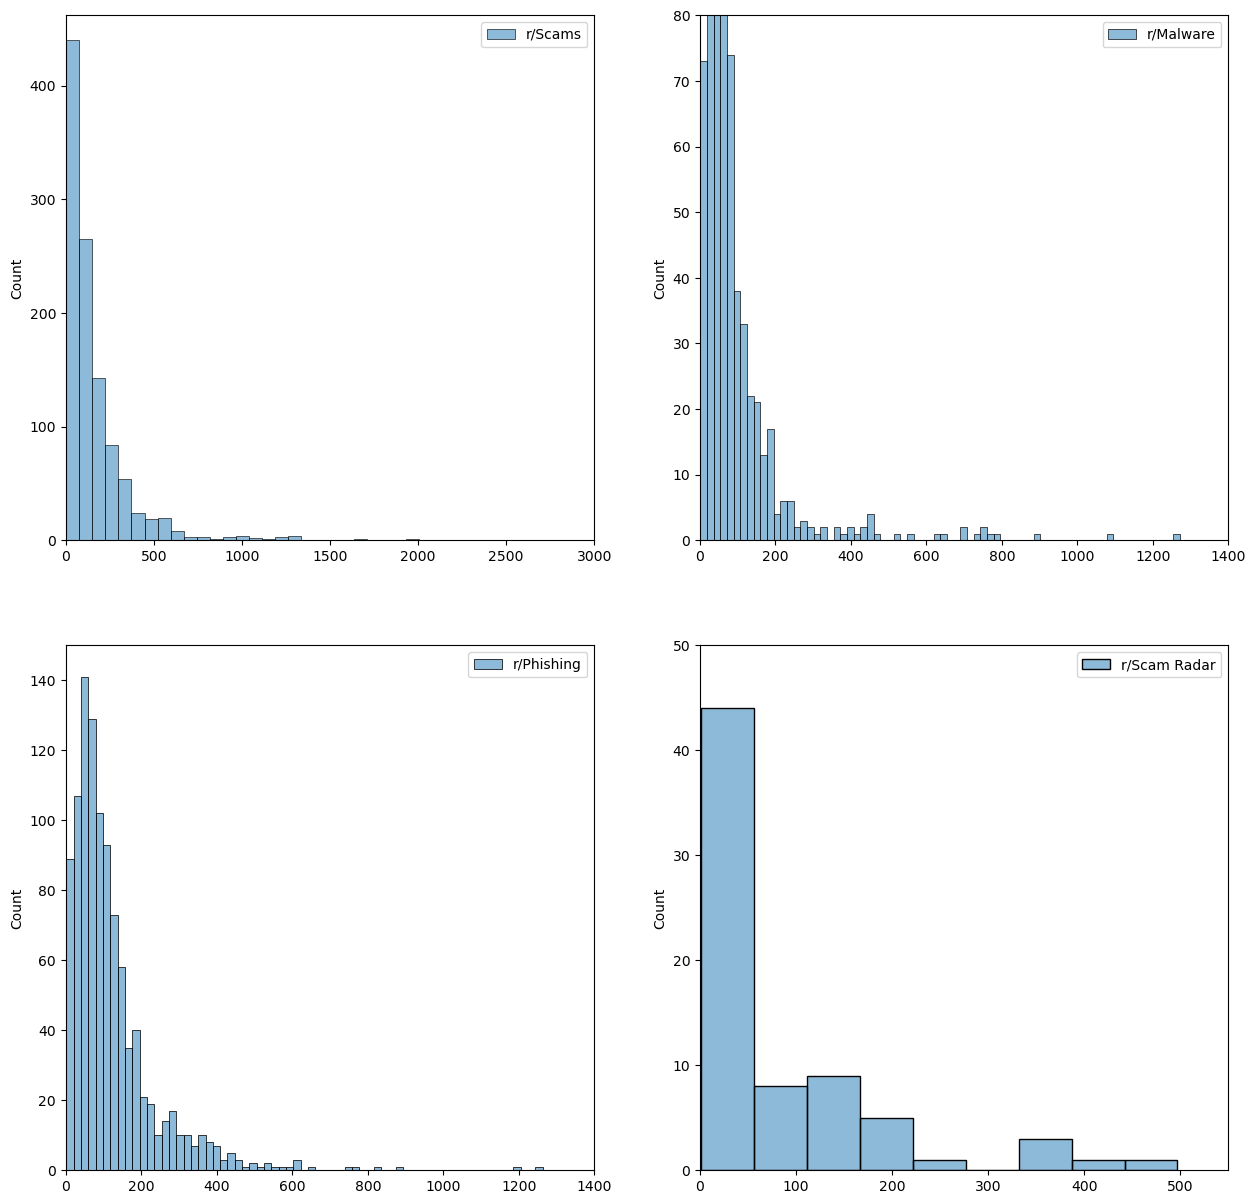

In [60]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.histplot(data=scams, ax=ax[0, 0], bins=80, label='r/Scams', color ='red')
ax[0, 0].set_xlim(0, 3000)
ax[0, 0].legend()
sns.histplot(data=malware, ax=ax[0, 1], label='r/Malware', color = 'purple')
ax[0, 1].set_ylim(0, 80)
ax[0, 1].set_xlim(0, 1400)
ax[0, 1].legend()
sns.histplot(data=phishing, ax=ax[1, 0], label='r/Phishing', color='pink')
ax[1, 0].set_ylim(0, 150)
ax[1, 0].set_xlim(0, 1400)
ax[1, 0].legend()
sns.histplot(data=scamradar, ax=ax[1, 1], label='r/Scam Radar', color='turquoise')
ax[1, 1].set_ylim(0, 50)
ax[1, 1].set_xlim(0, 550)
ax[1, 1].legend()

In [61]:
cvec = CountVectorizer(stop_words='english')
cvec_text = pd.DataFrame((cvec.fit_transform(spamposts['self_text'])).todense(), 
                         columns= cvec.get_feature_names_out())
cvec_text.head()

,00,000,0000,000000,00000000,00000001,00000009,0000011,00001,000018ea0000,...,𝒘𝒉𝒂𝒕,𝒘𝒉𝒆𝒓𝒆,𝒘𝒉𝒊𝒄𝒉,𝒘𝒊𝒕𝒉𝒅𝒓𝒂𝒘,𝒘𝒐𝒖𝒍𝒅,𝟏𝟔𝟓𝒌,𝟐𝟗𝟖,𝟓𝟑𝟔𝟐,𝟔𝟏𝟖𝟔𝟎𝟎𝟕𝟑𝟒𝟎𝟒,𝟕𝟐𝟓
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

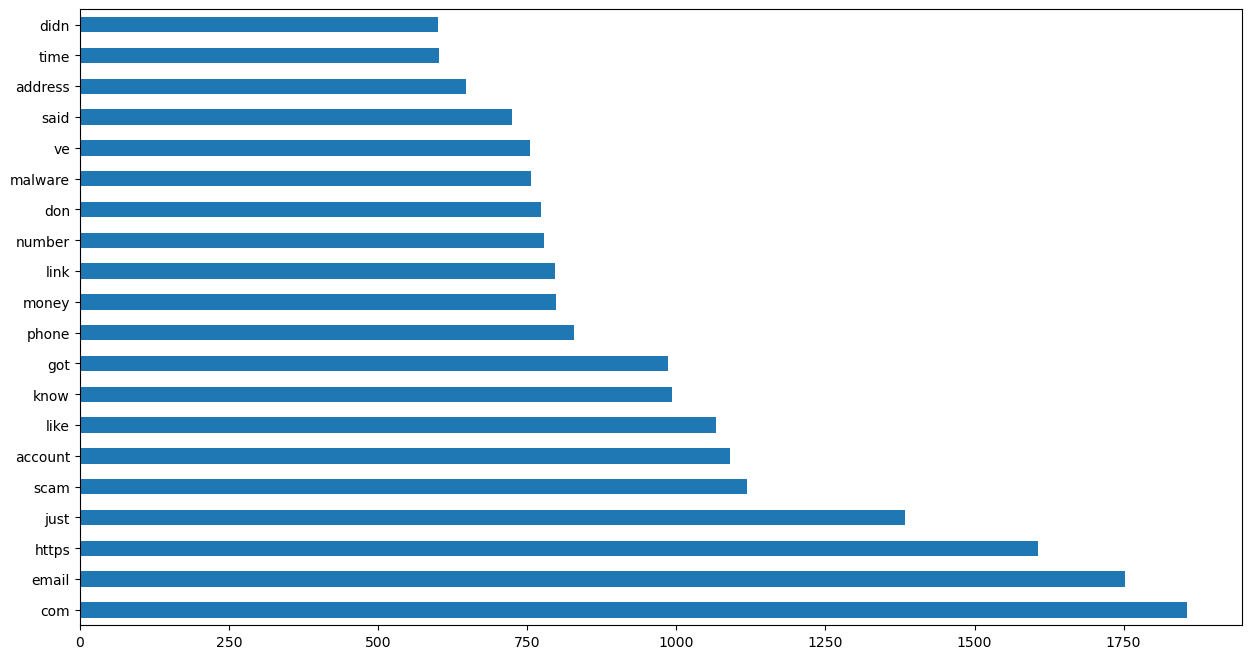

In [62]:
plt.figure(figsize=(15,8))
cvec_text.sum().sort_values(ascending=False).head(20).plot(kind='barh')

<Axes: >

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120789 (\N{MATHEMATICAL BOLD DIGIT SEVEN}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120784 (\N{MATHEMATICAL BOLD DIGIT TWO}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120787 (\N{MATHEMATICAL BOLD DIGIT FIVE}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120789 (\N{MATHEMATICAL BOLD DIGIT SEVEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120784 (\N{MATHEMATICAL BOLD DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.

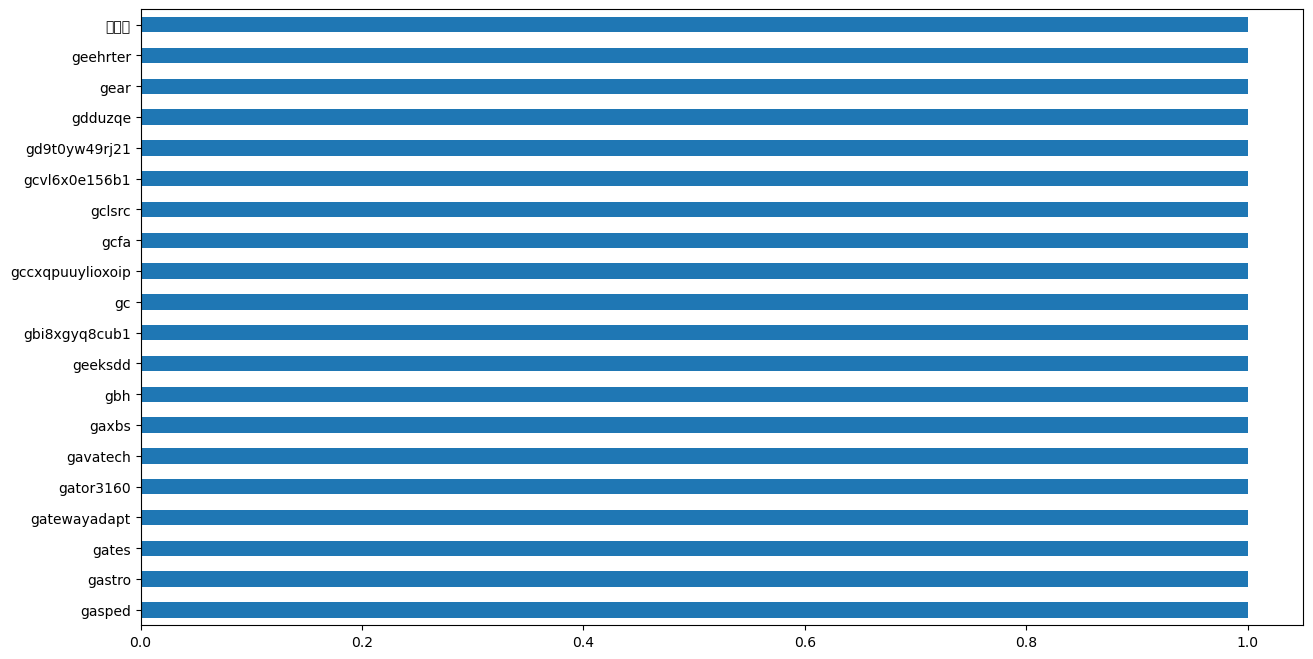

In [63]:
plt.figure(figsize=(15,8))
cvec_text.sum().sort_values(ascending=False).tail(20).plot(kind='barh')

In [64]:
punctuation = ['.',',','?','!','"', "'", ':', ';']

spamposts['punc_count'] = [sum (1 for punc in status if punc in punctuation) 
                           for status in spamposts['self_text']]

scams_punc = spamposts[spamposts['subreddit'] == 'Scams'][['punc_count']]
malware_punc = spamposts[spamposts['subreddit'] == 'Malware'][['punc_count']]
phishing_punc = spamposts[spamposts['subreddit'] == 'phishing'][['punc_count']]
scamradar_punc = spamposts[spamposts['subreddit'] == 'scam_radar'][['punc_count']]

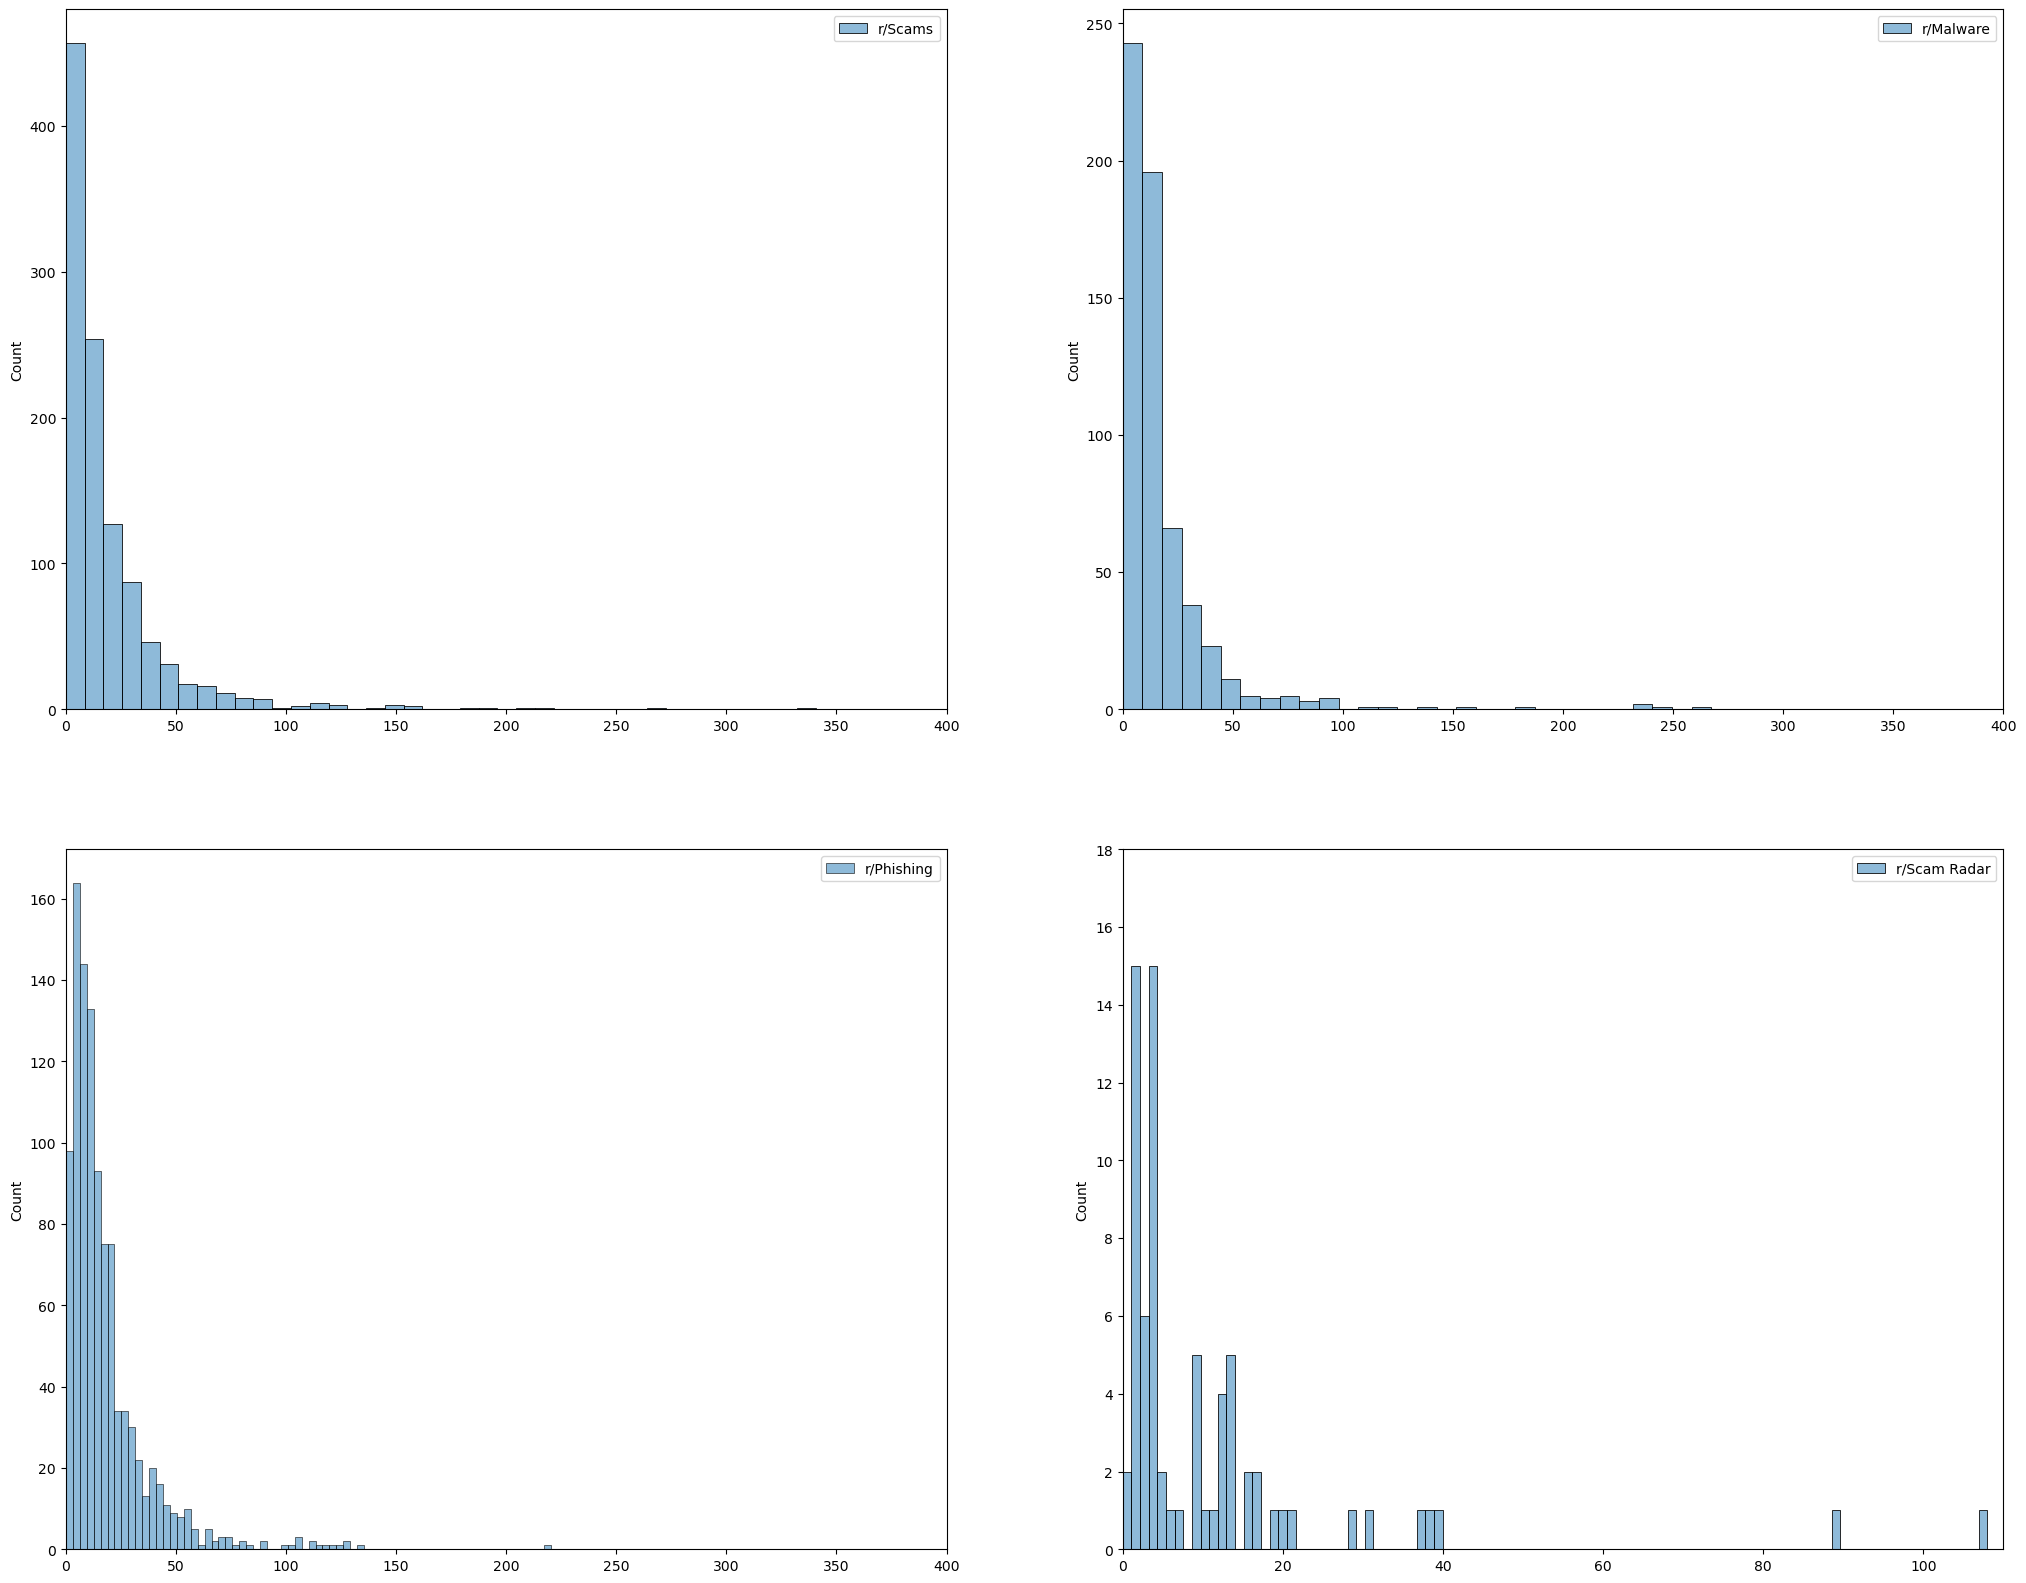

In [65]:
fig, ax = plt.subplots(2,2, figsize=(25,20))

sns.histplot(data=scams_punc, ax=ax[0, 0], bins=100, label='r/Scams', color ='red')
ax[0, 0].set_ylim(0, 480)
ax[0, 0].set_xlim(0, 400)
ax[0, 0].legend()
sns.histplot(data=malware_punc, ax=ax[0, 1],bins=100, label='r/Malware', color = 'purple')
ax[0, 1].set_xlim(0, 400)
ax[0, 1].legend()
sns.histplot(data=phishing_punc, ax=ax[1, 0], label='r/Phishing', color='pink')
ax[1, 0].set_xlim(0, 400)
ax[1, 0].legend()
sns.histplot(data=scamradar_punc, ax=ax[1, 1], bins=100, label='r/Scam Radar', color='turquoise')
ax[1, 1].set_ylim(0, 18)
ax[1, 1].set_xlim(0, 110)
ax[1, 1].legend()

In [66]:
scams_punc.mean()

punc_count    20.073801
dtype: float64

In [67]:
means = [scams_punc.mean(), malware_punc.mean(), phishing_punc.mean(), scamradar_punc.mean()]
means

[punc_count    20.073801
 dtype: float64,
 punc_count    21.949264
 dtype: float64,
 punc_count    18.447573
 dtype: float64,
 punc_count    11.236111
 dtype: float64]

#### Movie Reviews

In [68]:
moviereviews.head()

,created_utc,title,self_text,subreddit
0,1.683472e+09,"Announcement: Changes, Looking for Mods, Join ...",# This Reddit group is going to have a revamp ...,moviereviews
1,1.697134e+09,Discover the Latest Releases: New Movies from ...,&#x200B;\n\n|\#|Name|Year Released|Genres|\n|:...,moviereviews
3,1.697388e+09,Little Miss Rawther Malayalam Movie Review,\#LittleMissRawther #Malayalam #MovieReview\n\...,moviereviews
6,1.697134e+09,The John Wick series is a masterpiece.,These films get a lot of praise as action movi...,moviereviews
8,1.697090e+09,Who are your top 5 movie creators of all time?,This includes people who just make the best mo...,moviereviews


In [69]:
moviereviews['self_text_len'] = moviereviews['self_text'].apply(len)
moviereviews['self_text_count'] = moviereviews['self_text'].apply(lambda x: len(x.split()))
moviereviews.head(3)

,created_utc,title,self_text,subreddit,self_text_len,self_text_count
0,1.683472e+09,"Announcement: Changes, Looking for Mods, Join ...",# This Reddit group is going to have a revamp ...,moviereviews,289,53
1,1.697134e+09,Discover the Latest Releases: New Movies from ...,&#x200B;\n\n|\#|Name|Year Released|Genres|\n|:...,moviereviews,2300,298
3,1.697388e+09,Little Miss Rawther Malayalam Movie Review,\#LittleMissRawther #Malayalam #MovieReview\n\...,moviereviews,155,20


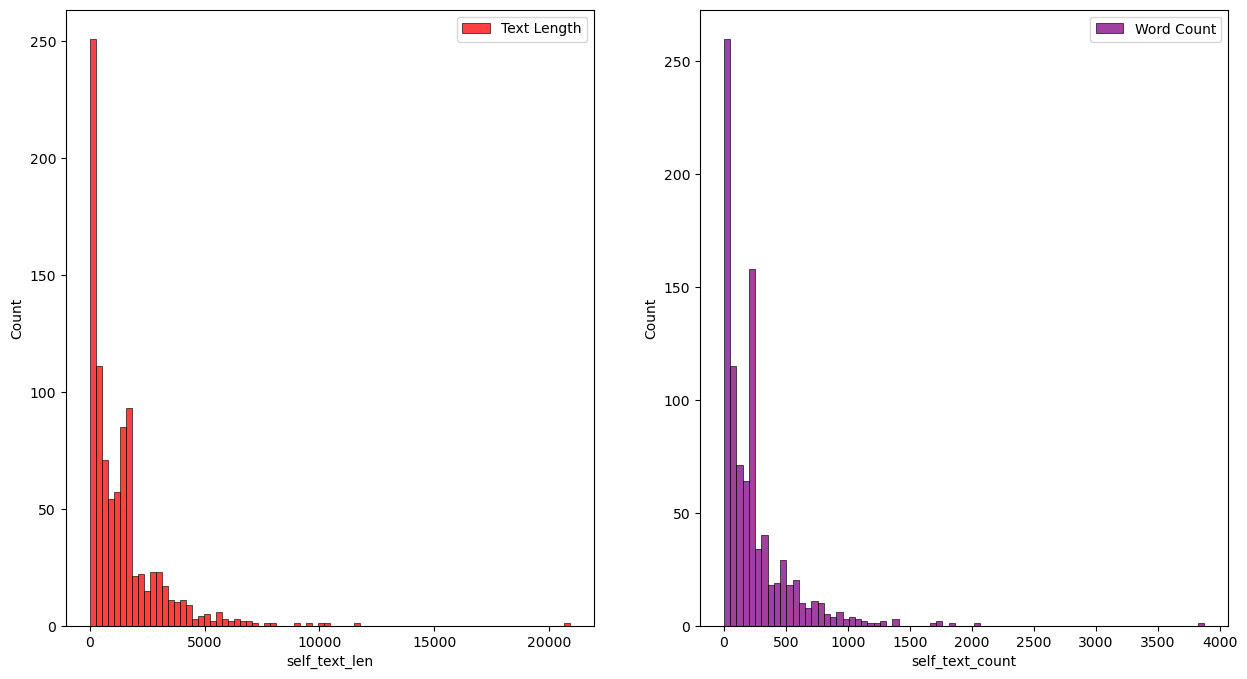

In [70]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(data=moviereviews['self_text_len'], ax=ax[0], bins=80, label='Text Length', 
             color ='red')
ax[0].legend()
sns.histplot(data=moviereviews['self_text_count'], ax=ax[1], label='Word Count', color = 'purple')
ax[1].legend()

In [71]:
cvec2 = CountVectorizer(stop_words='english')
cvec2_text = pd.DataFrame((cvec2.fit_transform(moviereviews['self_text'])).todense(), 
                         columns= cvec2.get_feature_names_out())
cvec2_text.head()

,00,000,007,01,05,10,100,1000,1000000000,1001,...,மக,மன,மல,யண,ரம,றத,லப,லம,வசனத,ஷன
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

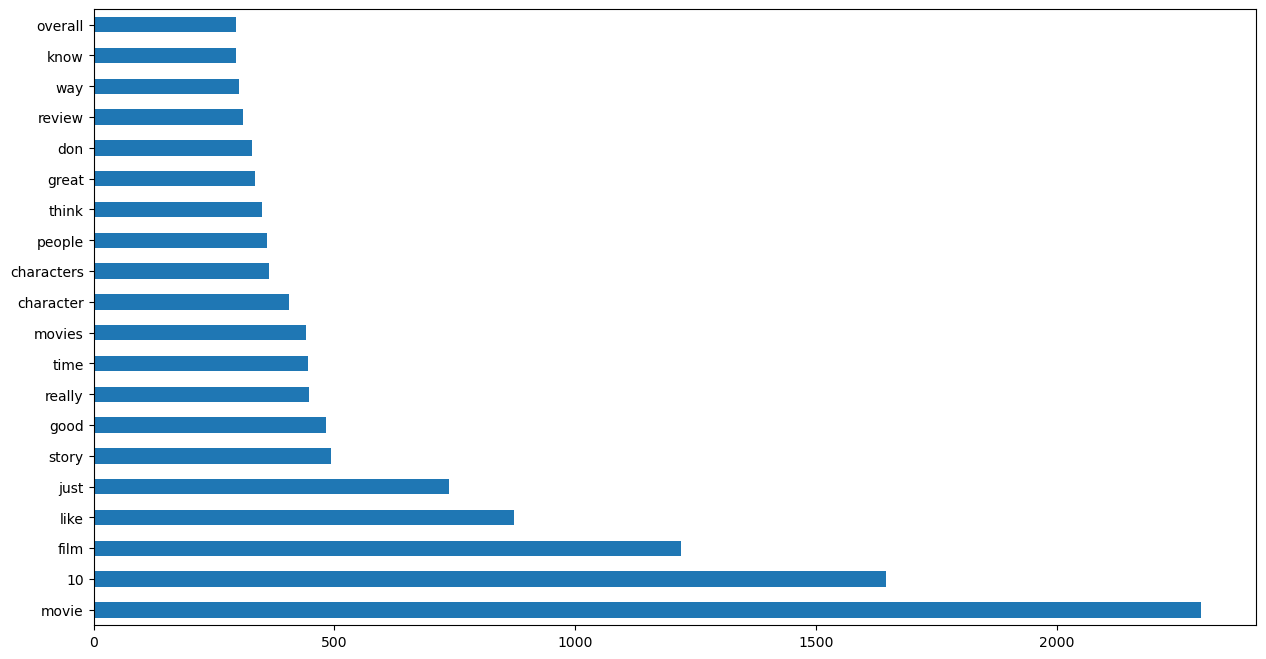

In [72]:
plt.figure(figsize=(15,8))
cvec2_text.sum().sort_values(ascending=False).head(20).plot(kind='barh')

<Axes: >

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2999 (\N{TAMIL LETTER SSA}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Tamil natively.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2985 (\N{TAMIL LETTER NNNA}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2999 (\N{TAMIL LETTER SSA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2985 (\N{TAMIL 

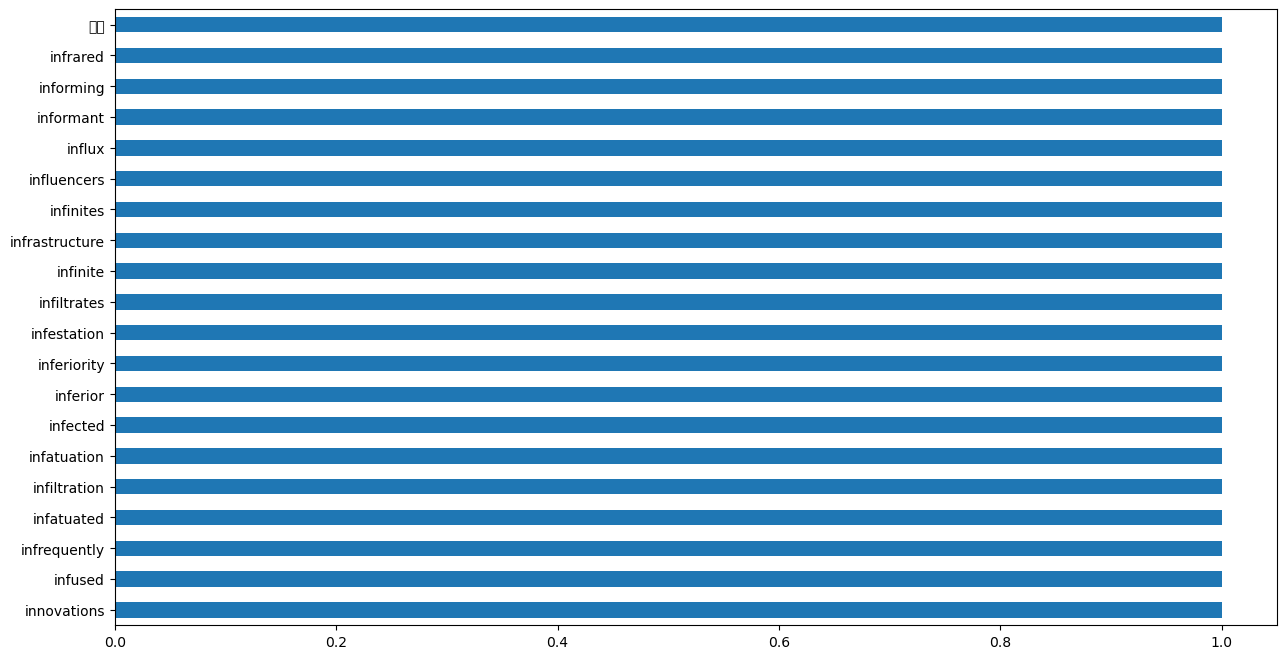

In [73]:
plt.figure(figsize=(15,8))
cvec2_text.sum().sort_values(ascending=False).tail(20).plot(kind='barh')

### Merging DataFrames

In [74]:
df = pd.concat([spamposts, moviereviews], axis=0)
df['subreddit'].value_counts()

Scams           1084
phishing        1030
moviereviews     925
Malware          611
scam_radar        72
Name: subreddit, dtype: int64

In [75]:
df.head()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams,939,183,32.0
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams,481,92,4.0
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams,1377,254,27.0
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams,192,41,5.0
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams,866,161,24.0


In [78]:
df.to_csv('../Data/merged_data.csv', index=False)